<a href="https://colab.research.google.com/github/Aninda-Das/responsive-gym-website/blob/main/Week2_class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving photo_2024-11-29_18-01-45.jpg to photo_2024-11-29_18-01-45 (1).jpg


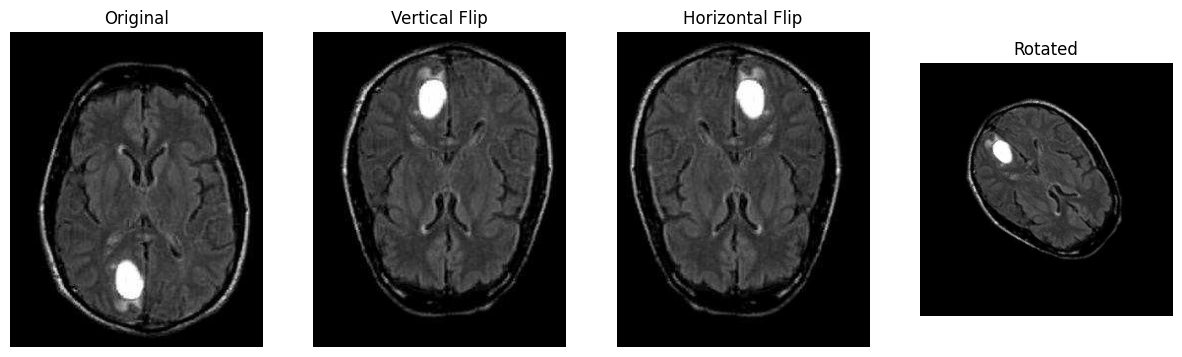

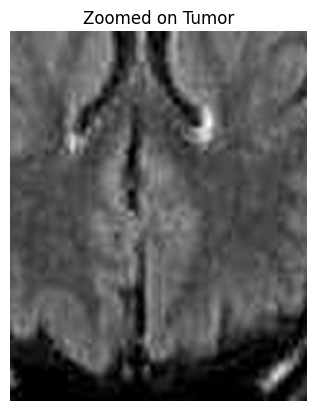

In [4]:
from PIL import Image, ImageOps

# Upload the image
from google.colab import files
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image = Image.open('/content/photo_2024-11-29_18-01-45.jpg')

# Step 1: Apply vertical flip
vertical_flip = ImageOps.flip(image)
vertical_flip.save("vertical_flip.jpg")

# Step 2: Apply horizontal flip to the vertically flipped image
horizontal_flip = ImageOps.mirror(vertical_flip)
horizontal_flip.save("horizontal_flip.jpg")

# Step 3: Apply rotation to the vertically flipped image (e.g., 45 degrees)
rotation_angle = 45  # You can specify a different angle if needed
rotated_image = vertical_flip.rotate(rotation_angle, expand=True)
rotated_image.save("rotated_image.jpg")

# Step 4: Apply 30% zoom on the horizontally flipped image, focusing on the tumor
# Assuming the tumor is in the bottom center region for simplicity
tumor_zoom_factor = 0.3
width, height = horizontal_flip.size

# Calculate the cropping box for zoom
tumor_box = (
    int(width * 0.3),   # Left
    int(height * 0.55), # Top
    int(width * 0.7),   # Right
    int(height * 0.85)  # Bottom
)

zoomed_image = horizontal_flip.crop(tumor_box)
zoomed_image = zoomed_image.resize((width, height), Image.Resampling.LANCZOS)
zoomed_image.save("zoomed_image.jpg")

# Display the images
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Original Image
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")
ax[0].axis("off")

# Vertical Flip
ax[1].imshow(vertical_flip, cmap='gray')
ax[1].set_title("Vertical Flip")
ax[1].axis("off")

# Horizontal Flip
ax[2].imshow(horizontal_flip, cmap='gray')
ax[2].set_title("Horizontal Flip")
ax[2].axis("off")

# Rotated Image
ax[3].imshow(rotated_image, cmap='gray')
ax[3].set_title("Rotated")
ax[3].axis("off")

plt.show()

# Zoomed Image
plt.imshow(zoomed_image, cmap='gray')
plt.title("Zoomed on Tumor")
plt.axis("off")
plt.show()
